## Hospitality Analysis using Pandas

### Importing Pandas library

In [1]:
import pandas as pd

### Reading data files

In [2]:
df_bookings = pd.read_csv('datasets//fact_bookings.csv')
df_hotels = pd.read_csv('datasets//dim_hotels.csv')
df_rooms = pd.read_csv('datasets//dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets//fact_aggregated_bookings.csv')
df_date = pd.read_csv('datasets//dim_date.csv')

### Exploratory Data Analysis: fact_bookings data

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape # Gives dimensions

(134590, 12)

In [5]:
df_bookings.describe() # Gives quick statistics on Numerical columns

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [6]:
df_bookings.room_category.unique() # Gives unique room categories

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
df_bookings.booking_platform.unique() # Gives unique booking platforms

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<AxesSubplot:>

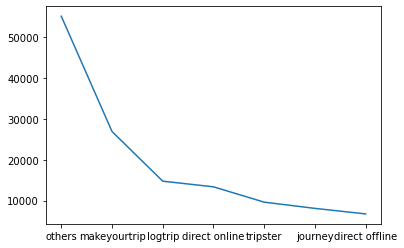

In [8]:
df_bookings.booking_platform.value_counts().plot()  #plots line chart by default

<AxesSubplot:>

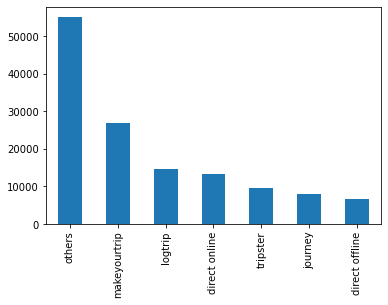

In [9]:
df_bookings.booking_platform.value_counts().plot(kind="bar")  # Bar plot

<AxesSubplot:>

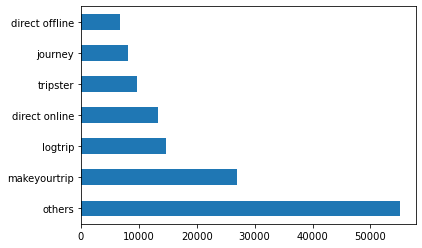

In [10]:
df_bookings.booking_platform.value_counts().plot(kind="barh")  # Bar plot in Horizontal way

### Exploratory Data Analysis: dim_hotels data

In [11]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [14]:
df_hotels.city.value_counts().sort_values()

Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: city, dtype: int64

In [15]:
df_hotels.property_name.value_counts()

Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: property_name, dtype: int64

### Exploratory Data Analysis: fact_aggregate_bookings data

In [16]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [17]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [18]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [19]:
df_agg_bookings.shape

(9200, 5)

In [20]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [21]:
df_agg_bookings.room_category.value_counts()

RT1    2300
RT2    2300
RT3    2300
RT4    2300
Name: room_category, dtype: int64

In [22]:
# Days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [23]:
df_agg_bookings.sort_values(by='capacity', ascending=0)

,property_id,check_in_date,room_category,successful_bookings,capacity
3128,17558,1-Jun-22,RT2,19,50.0
2128,17558,22-May-22,RT2,38,50.0
1728,17558,18-May-22,RT2,21,50.0
5828,17558,28-Jun-22,RT2,26,50.0
3928,17558,9-Jun-22,RT2,27,50.0
...,...,...,...,...,...
7475,19559,14-Jul-22,RT4,2,3.0
7476,16558,14-Jul-22,RT4,2,3.0
7375,19559,13-Jul-22,RT4,2,3.0
8,17561,1-May-22,RT1,22,NaN


In [24]:
df_agg_bookings.capacity.max()

50.0

In [25]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()].value_counts()

property_id  check_in_date  room_category  successful_bookings  capacity
17558        1-Jul-22       RT2            27                   50.0        1
             27-Jun-22      RT2            24                   50.0        1
             3-Jun-22       RT2            20                   50.0        1
             3-Jul-22       RT2            34                   50.0        1
             29-May-22      RT2            34                   50.0        1
                                                                           ..
             18-Jun-22      RT2            34                   50.0        1
             18-Jul-22      RT2            20                   50.0        1
             17-May-22      RT2            19                   50.0        1
             17-Jun-22      RT2            24                   50.0        1
             9-May-22       RT2            24                   50.0        1
Length: 92, dtype: int64

### Data Cleaning

In [26]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [27]:
df_bookings[df_bookings.no_guests < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [28]:
df_bookings = df_bookings[df_bookings.no_guests >= 0]

In [29]:
df_bookings.shape

(134578, 12)

In [30]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [31]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [32]:
avg, std

(15378.036937686695, 93040.15493143328)

In [33]:
higher_lim = avg + 3*std
higher_lim

294498.50173198653

In [34]:
lower_lim = avg - 3*std
lower_lim

-263742.4278566132

In [35]:
df_bookings[df_bookings.revenue_generated > higher_lim] # Shows the outliers

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [36]:
df_bookings = df_bookings[df_bookings.revenue_generated <= higher_lim]

In [37]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 45220)

In [38]:
df_bookings.shape

(134573, 12)

In [39]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [40]:
# Checking if the max value in revenue_realized column is valid or not
higher_lim = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_lim

33479.3586618449

In [41]:
df_bookings[df_bookings.revenue_realized > higher_lim]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [42]:
# These outliers belong to RT4 room type. Let's analyze RT4 room type
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [43]:
higher_lim_rt4 = df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.mean() + 3*df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.std()
higher_lim_rt4

50585.1056709996

In [44]:
df_bookings[df_bookings.revenue_realized > higher_lim_rt4]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [45]:
# So we don't have any outlier with regards to revenue_realized column

In [46]:
# NA handling
df_bookings.isnull().sum()


booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [47]:
# Cleaning of Aggregate bookings data
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [48]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [49]:
#need to fill null values in capacity column
# first find out more about capacity column
df_agg_bookings.capacity.describe()

count    9198.000000
mean       25.280496
std        11.442080
min         3.000000
25%        18.000000
50%        25.000000
75%        34.000000
max        50.000000
Name: capacity, dtype: float64

In [50]:
# filling null values by mean value of capacity
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.mean(), inplace=True)

In [51]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [52]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [53]:
# successful bookings can't be greater than capacity, filtering them out
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9194.000000,9194.000000,9194.000000
mean,18040.300957,14.626387,25.278830
std,1099.702158,7.589974,11.442051
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,43.000000,50.000000


### Data Transformation

In [54]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


#### Business terminology:
Occupancy percentage = Successful bookings / Capacity


In [55]:
# Add a column named occupancy ratio to the dataframe object
df_agg_bookings['occ_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [56]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [57]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x/100, 2))


In [58]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.01
1,19562,1-May-22,RT1,28,30.0,0.01
2,19563,1-May-22,RT1,23,30.0,0.01
4,16558,1-May-22,RT1,18,19.0,0.01
5,17560,1-May-22,RT1,28,40.0,0.01


### Insights Generation (Ad Hoc Analysis)

#### 1. Average occupancy rate in each of the room categories

In [59]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    0.01
RT2    0.01
RT3    0.01
RT4    0.01
Name: occ_pct, dtype: float64

In [60]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [61]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,0.01,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,0.01,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,0.01,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,0.01,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,0.01,RT1,Standard


In [62]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           0.01
Premium         0.01
Presidential    0.01
Standard        0.01
Name: occ_pct, dtype: float64

In [63]:
df.drop('room_id', axis=1, inplace=True)


In [64]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,0.01,Standard
1,19562,1-May-22,RT1,28,30.0,0.01,Standard
2,19563,1-May-22,RT1,23,30.0,0.01,Standard
3,16558,1-May-22,RT1,18,19.0,0.01,Standard
4,17560,1-May-22,RT1,28,40.0,0.01,Standard


#### 2. Print average occupancy rate per city

In [65]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [66]:
df = pd.merge(df, df_hotels, on='property_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9189,16563,27-Jul-22,RT4,10,18.0,0.01,Presidential,Atliq Palace,Business,Delhi
9190,16563,28-Jul-22,RT4,9,18.0,0.01,Presidential,Atliq Palace,Business,Delhi
9191,16563,29-Jul-22,RT4,9,18.0,0.01,Presidential,Atliq Palace,Business,Delhi
9192,16563,30-Jul-22,RT4,11,18.0,0.01,Presidential,Atliq Palace,Business,Delhi


In [67]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai


In [68]:
df.groupby('city')['occ_pct'].mean()

city
Bangalore    0.006522
Delhi        0.008282
Hyderabad    0.006937
Mumbai       0.006942
Name: occ_pct, dtype: float64

<AxesSubplot:ylabel='city'>

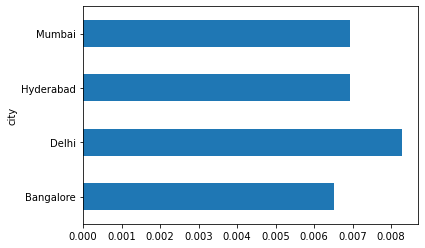

In [69]:
df.groupby('city')['occ_pct'].mean().plot(kind='barh')

#### 3. When was the occupancy better: Weekday or Weekend?

In [70]:
df_date = pd.read_csv('datasets//dim_date.csv')

In [71]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [72]:
df = pd.merge(df, df_date, left_on='check_in_date', right_on='date')

In [73]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,0.01,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,0.01,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,0.01,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,0.01,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [74]:
df.drop('date', axis=1, inplace=True)

In [75]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,0.01,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,0.01,Elite,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,0.01,Premium,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,0.01,Presidential,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,0.01,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday


In [76]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    0.01
weekend     0.01
Name: occ_pct, dtype: float64

#### 4. In the month of June, what is the occupancy rate of different cities

In [77]:
df_june_22 = df[df["mmm yy"]=='Jun 22'].groupby("city")["occ_pct"].mean().round(2)

In [78]:
df_june_22

city
Bangalore    0.01
Delhi        0.01
Hyderabad    0.01
Mumbai       0.01
Name: occ_pct, dtype: float64

#### 5. Incorporate new data: August data, and analyze

In [79]:
df_august = pd.read_csv("datasets//new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [80]:
df_august.shape

(7, 13)

In [81]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis=0)

In [82]:
latest_df.tail(12)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
6492,17558,31-Jul-22,RT4,3,6.0,0.01,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend,NaN
6493,16563,31-Jul-22,RT1,34,41.0,0.01,Standard,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend,NaN
6494,16563,31-Jul-22,RT2,32,38.0,0.01,Elite,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend,NaN
6495,16563,31-Jul-22,RT3,14,20.0,0.01,Premium,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend,NaN
6496,16563,31-Jul-22,RT4,13,18.0,0.01,Presidential,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92


In [83]:
latest_df.shape

(6504, 14)

#### 6. Print revenue realized per city

In [84]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [85]:
df_bookings = pd.merge(df_bookings, df_hotels, on='property_id')

In [86]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [87]:
df_bookings.groupby("city")["revenue_realized"].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

#### 7. Print month by month revenue

In [88]:
df_date_bookings = pd.merge(df_bookings, df_date, left_on="check_in_date", right_on="date")

In [89]:
df_date_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [90]:
# no results shown above, because: the date variable is not stored with date type. It is stored with object data type
df_bookings.info(), df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

(None, None)

In [91]:
# Converting into proper date time format
df_date["date"] = pd.to_datetime(df_date["date"])

In [92]:
df_bookings["check_in_date"] = pd.to_datetime(df_bookings["check_in_date"])

In [93]:
df_date_bookings = pd.merge(df_bookings, df_date, left_on="check_in_date", right_on="date")

In [94]:
df_date_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [95]:
df_date_bookings.groupby('mmm yy')['revenue_realized'].sum().round(2)

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

#### 8. Revenue realized per hotel type

In [96]:
df_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [97]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [98]:
df_bookings.groupby('category')["revenue_realized"].sum()

category
Business     655967037
Luxury      1052569562
Name: revenue_realized, dtype: int64

In [99]:
df_bookings.groupby('property_name')["revenue_realized"].sum().sort_values()

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

#### 9. Average rating per city

In [100]:
df_bookings.groupby("city")["ratings_given"].mean().round(2).sort_values()

city
Bangalore    3.41
Mumbai       3.65
Hyderabad    3.66
Delhi        3.78
Name: ratings_given, dtype: float64

#### 10. A pie chart of revenue realized per booking platform

<AxesSubplot:ylabel='revenue_realized'>

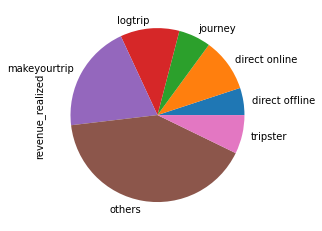

In [101]:
df_bookings.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")